In [1]:
# Importing useful packages
import numpy as np
from scipy import stats
import pandas as pd
import sklearn as sk
import seaborn as sb
import datetime as dt
import pylab 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from new_var import calc
from outliers import outlier
%matplotlib inline

In [2]:
ipo_data = pd.read_excel("Competation #1 Raw Data_New.xlsx",header=0,na_values='-' )
print(ipo_data.dtypes)
print(ipo_data.head(12))#printing head

I1          object
I2          object
I3          object
P(IPO)     float64
P(H)       float64
P(L)       float64
P(1Day)    float64
C1         float64
C2         float64
C3         float64
C4         float64
C5         float64
C6         float64
C7         float64
T1         float64
T2         float64
T3         float64
T4         float64
T5         float64
S1         float64
S2         float64
S3         float64
dtype: object
      I1                                     I2    I3  P(IPO)  P(H)  P(L)  \
0   AATI     ADVANCED ANALOGIC TECHNOLOGIES INC  3674    10.0   9.5   8.5   
1   ABPI        ACCENTIA BIOPHARMACEUTICALS INC  2834     8.0  10.0   8.0   
2   ACAD             ACADIA PHARMACEUTICALS INC  2834     7.0  14.0  12.0   
3   ACHN          ACHILLION PHARMACEUTICALS INC  2834    11.5  16.0  14.0   
4   ACLI        AMERICAN COMMERCIAL LINES INC.   4492    21.0  21.0  19.0   
5   ACOM                     Ancestry.com Inc.   7379    13.5  14.5  12.5   
6   ACOR                ACORD

In [82]:
# Some values dont make sesne (like negatives) and P(H) having a zero min - maybe look into when p(h) < p(L)
#converting 1 and 0 to true and false
ipo_data.C2 = ipo_data.C2.astype(int)
# printing summary stats
ipo_data.describe()

,P(IPO),P(H),P(L),P(1Day),C1,C2,C4,C7,Y1,Y2,C3x,C6x,C5x,T3x,T4x,T5x,S1x,S2x,S3x
count,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000
mean,13.672646,15.277467,13.335060,22.382172,143.625749,0.863636,0.007389,432.224527,0.520528,0.711144,0.529326,0.366569,4.617513,0.918872,0.630185,0.058048,0.005484,0.009125,0.011840
std,5.031353,4.524586,4.237828,31.555522,109.745034,0.343426,0.032336,838.320379,0.499945,0.453564,0.499506,0.482221,6.226995,0.624282,0.076196,0.150450,0.004771,0.004227,0.008960
min,3.000000,0.000000,3.000000,0.000000,10.000000,0.000000,-0.091043,0.074000,0.000000,0.000000,0.000000,0.000000,0.283223,0.703925,0.395480,0.031595,0.001389,0.002152,0.005125
25%,10.000000,13.000000,11.000000,11.092500,85.000000,1.000000,-0.013352,41.511500,0.000000,0.000000,0.000000,0.000000,2.860940,0.883763,0.580815,0.047445,0.004154,0.007031,0.009577
50%,13.500000,15.481190,13.000000,15.000000,110.000000,1.000000,0.007282,134.738000,1.000000,1.000000,1.000000,0.000000,3.771931,0.896719,0.629635,0.051909,0.005069,0.008609,0.011324
75%,17.000000,17.000000,15.000000,21.030001,152.750000,1.000000,0.030941,500.459962,1.000000,1.000000,1.000000,1.000000,4.859228,0.909672,0.674698,0.056712,0.006266,0.010548,0.012847
max,31.932066,35.294384,30.892968,242.061645,600.715144,1.000000,0.092896,5176.761628,1.000000,1.000000,1.000000,1.000000,99.787255,17.165085,1.443089,3.976769,0.121442,0.091082,0.233397


In [4]:
# Replacing NaN values with their corresponding mean value
for i in range(len(ipo_data.columns)):
    if ipo_data.iloc[:,i].dtype == float:
        ipo_data.iloc[:,i]=ipo_data.iloc[:,i].fillna(ipo_data.iloc[:,i].mean())
        print('%s' % ipo_data.columns[i])

# Removing 0 and negatives for T' calculations        
ipo_data['T2']=ipo_data['T2'].mask(ipo_data['T2'] <= 0,ipo_data['T2'].mean())
ipo_data['T1']=ipo_data['T1'].mask(ipo_data['T1'] <= 0,ipo_data['T1'].mean())
ipo_data['T3']=ipo_data['T3'].mask(ipo_data['T3'] <= 0,ipo_data['T3'].mean())
ipo_data['T4']=ipo_data['T4'].mask(ipo_data['T4'] <= 0,ipo_data['T4'].mean())
ipo_data['T5']=ipo_data['T5'].mask(ipo_data['T5'] <= 0,ipo_data['T5'].mean())
ipo_data['S1']=ipo_data['S1'].mask(ipo_data['S1'] <= 0,ipo_data['S1'].mean())
ipo_data.describe()


P(IPO)
P(H)
P(L)
P(1Day)
C1
C3
C4
C5
C6
C7
T1
T2
T3
T4
T5
S1
S2
S3


,P(IPO),P(H),P(L),P(1Day),C1,C3,C4,C5,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
count,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,6.820000e+02,6.820000e+02,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.00000,682.000000,682.000000
mean,13.837666,15.481190,13.515045,25.934766,149.728788,1.788904,0.007282,4.935776e+07,1.241519e+07,500.459962,465.634361,12796.021729,11445.972694,295.217099,680.217655,68.52323,120.104258,144.759178
std,6.031467,6.604398,5.792641,72.042293,150.328785,158.308600,0.032775,1.039156e+08,2.501761e+07,1558.767222,175.612567,5401.439280,4776.337830,120.388060,471.846488,38.97700,84.766654,69.225403
min,3.000000,0.000000,3.000000,0.000000,10.000000,-786.239000,-0.162352,3.693227e+06,5.250000e+05,0.074000,132.000000,527.000000,3003.000000,70.000000,167.000000,5.00000,20.000000,26.000000
25%,10.000000,13.000000,11.000000,11.092500,85.000000,-0.750000,-0.013352,1.874682e+07,5.004180e+06,41.511500,351.250000,9213.250000,8238.500000,214.000000,463.250000,45.00000,73.000000,100.000000
50%,13.500000,15.481190,13.000000,15.000000,110.000000,0.070000,0.007282,2.759165e+07,7.500000e+06,134.738000,444.500000,12064.000000,10811.000000,280.000000,625.500000,60.00000,100.500000,134.000000
75%,17.000000,17.000000,15.000000,21.030001,152.750000,0.600000,0.030941,4.938184e+07,1.208721e+07,500.459962,550.750000,15240.250000,13751.500000,353.750000,794.500000,84.75000,141.750000,173.000000
max,85.000000,135.000000,108.000000,1159.200562,2087.000000,3864.500000,0.092896,2.138085e+09,4.212336e+08,30683.000000,1750.000000,49056.000000,43952.000000,1058.000000,10277.000000,309.00000,944.000000,883.000000


In [5]:

for i in range(len(ipo_data.columns)): 
    if ipo_data.iloc[:,i].dtype == float:
        outlier(ipo_data.iloc[:,i],1)
print('Method {}: \n {}'.format(1, ipo_data.describe()))

C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Python for Comp 1\outliers.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = mean-3*std
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Python for Comp 1\outliers.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = mean+3*std


Method 1: 
            P(IPO)        P(H)        P(L)     P(1Day)          C1          C3  \
count  682.000000  682.000000  682.000000  682.000000  682.000000  682.000000   
mean    13.672646   15.277467   13.335060   22.382172  143.625749   -2.682476   
std      5.031353    4.524586    4.237828   31.555522  109.745034   44.916887   
min      3.000000    0.000000    3.000000    0.000000   10.000000 -473.136896   
25%     10.000000   13.000000   11.000000   11.092500   85.000000   -0.750000   
50%     13.500000   15.481190   13.000000   15.000000  110.000000    0.070000   
75%     17.000000   17.000000   15.000000   21.030001  152.750000    0.600000   
max     31.932066   35.294384   30.892968  242.061645  600.715144  476.714704   

               C4            C5            C6           C7          T1  \
count  682.000000  6.820000e+02  6.820000e+02   682.000000  682.000000   
mean     0.007389  4.524868e+07  1.138759e+07   432.224527  461.974902   
std      0.032336  5.396774e+07  1.2

In [6]:

calc(ipo_data)

C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Python for Comp 1\new_var.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  x['Y1'][i]=0
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Python for Comp 1\new_var.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  x['Y1'][i]=1


0      0
1      1
2      1
3      1
4      0
5      0
6      1
7      1
8      1
9      1
10     1
11     1
12     0
13     0
14     1
15     1
16     0
17     1
18     1
19     0
20     1
21     0
22     0
23     1
24     0
25     1
26     1
27     0
28     1
29     1
      ..
652    1
653    0
654    1
655    0
656    0
657    0
658    1
659    0
660    1
661    1
662    0
663    0
664    0
665    1
666    0
667    1
668    1
669    0
670    1
671    1
672    0
673    0
674    0
675    1
676    1
677    0
678    1
679    0
680    0
681    0
Name: Y1, Length: 682, dtype: int32


C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Python for Comp 1\new_var.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  x['Y2'][i]=1
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Python for Comp 1\new_var.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  x['Y2'][i]=0


0      1
1      0
2      0
3      1
4      1
5      1
6      1
7      0
8      1
9      0
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     1
20     0
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
      ..
652    0
653    1
654    0
655    1
656    0
657    1
658    0
659    0
660    0
661    0
662    1
663    1
664    1
665    0
666    0
667    1
668    1
669    1
670    1
671    1
672    0
673    1
674    1
675    1
676    1
677    1
678    1
679    0
680    0
681    0
Name: Y2, Length: 682, dtype: int32


C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Python for Comp 1\new_var.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  x['C3x'][i]=1
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Python for Comp 1\new_var.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  x['C3x'][i]=0


0      1
1      0
2      0
3      0
4      1
5      1
6      0
7      0
8      0
9      1
10     1
11     0
12     1
13     0
14     1
15     1
16     1
17     1
18     1
19     1
20     0
21     1
22     0
23     0
24     0
25     0
26     1
27     0
28     1
29     0
      ..
652    1
653    1
654    0
655    1
656    1
657    0
658    1
659    1
660    0
661    0
662    1
663    0
664    0
665    1
666    1
667    0
668    0
669    0
670    0
671    0
672    1
673    0
674    0
675    1
676    1
677    0
678    0
679    1
680    1
681    1
Name: C3x, Length: 682, dtype: int32


C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Python for Comp 1\new_var.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  x['C6x'][i]=((x['P(IPO)'][i]-mid[i])/(mid[i]*100))
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Python for Comp 1\new_var.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  x['C6x'][i]=0


0       0.00111111
1                0
2                0
3                0
4           0.0005
5                0
6                0
7                0
8                0
9                0
10               0
11               0
12     0.000666667
13     0.000869565
14               0
15               0
16               0
17               0
18               0
19         0.00125
20               0
21     0.000666667
22               0
23               0
24               0
25               0
26               0
27     0.000526316
28               0
29               0
          ...     
652              0
653     0.00133333
654              0
655         0.0012
656    0.000384615
657              0
658              0
659    0.000333333
660              0
661              0
662       0.000625
663       0.000625
664              0
665              0
666    0.000857143
667              0
668              0
669     0.00133333
670              0
671              0
672     0.00114286
673     0.00

In [7]:
del ipo_data['C3']
del ipo_data['C5']
del ipo_data['C6']
del ipo_data['T1']
del ipo_data['T2']
del ipo_data['T3']
del ipo_data['T4']
del ipo_data['T5']
del ipo_data['S1']
del ipo_data['S2']
del ipo_data['S3']
ipo_data.describe()

,P(IPO),P(H),P(L),P(1Day),C1,C4,C7,Y1,Y2,C3x,C5x,T3x,T4x,T5x,S1x,S2x,S3x
count,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000
mean,13.672646,15.277467,13.335060,22.382172,143.625749,0.007389,432.224527,0.520528,0.711144,0.529326,4.617513,0.918872,0.630185,0.058048,0.005484,0.009125,0.011840
std,5.031353,4.524586,4.237828,31.555522,109.745034,0.032336,838.320379,0.499945,0.453564,0.499506,6.226995,0.624282,0.076196,0.150450,0.004771,0.004227,0.008960
min,3.000000,0.000000,3.000000,0.000000,10.000000,-0.091043,0.074000,0.000000,0.000000,0.000000,0.283223,0.703925,0.395480,0.031595,0.001389,0.002152,0.005125
25%,10.000000,13.000000,11.000000,11.092500,85.000000,-0.013352,41.511500,0.000000,0.000000,0.000000,2.860940,0.883763,0.580815,0.047445,0.004154,0.007031,0.009577
50%,13.500000,15.481190,13.000000,15.000000,110.000000,0.007282,134.738000,1.000000,1.000000,1.000000,3.771931,0.896719,0.629635,0.051909,0.005069,0.008609,0.011324
75%,17.000000,17.000000,15.000000,21.030001,152.750000,0.030941,500.459962,1.000000,1.000000,1.000000,4.859228,0.909672,0.674698,0.056712,0.006266,0.010548,0.012847
max,31.932066,35.294384,30.892968,242.061645,600.715144,0.092896,5176.761628,1.000000,1.000000,1.000000,99.787255,17.165085,1.443089,3.976769,0.121442,0.091082,0.233397


In [32]:
ipo_data.C6x = ipo_data.C6x.astype(float)

In [102]:
def standard(data,method):
    if data.dtype == float : #Making sure data isnt a string or int
        if method == 1:
            X_std = (data - data.min(axis=0)) / (data.max(axis=0) - data.min(axis=0))
            data = X_std * (1 - 0) + 0
            return data
##x=pd.DataFrame.copy(ipo_data)



for i in range(len(ipo_data.columns)): 
    if ipo_data.iloc[:,i].dtype == float:
        ipo_data.iloc[:,i]=standard(ipo_data.iloc[:,i],1)
x.describe()

print(x.dtypes)


I1          object
I2          object
I3          object
P(IPO)     float64
P(H)       float64
P(L)       float64
P(1Day)    float64
C1         float64
C2           int32
C4         float64
C7         float64
Y1           int32
Y2           int32
C3x          int32
C6x        float64
C5x        float64
T3x        float64
T4x        float64
T5x        float64
S1x        float64
S2x        float64
S3x        float64
dtype: object


In [113]:
# del x['P(IPO)']
# del x['P(H)']
# del x['P(L)']
# del x['P(1Day)']
train=['C3x','C4','C1','C7','C6x','T3x','T4x','T5x','S1x','S2x','S3x','C2']
X=ipo_data[train]
y=ipo_data['Y1']

In [114]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

rfe = RFE(logreg, 18)
rfe = rfe.fit(X,y)
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1 1 1 1]


In [115]:
# import statsmodels.api as sm
# X = x.loc[:,:].values
# #y = y.values

# from sklearn.linear_model import LogisticRegression
# from sklearn.cross_validation import train_test_split
# from sklearn import metrics 
# from sklearn.metrics import classification_report
# # Split data in train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)

# # Fit a logistic regression model
# LogReg = LogisticRegression()
# LogReg.fit(X_train, y_train)

# # Predict the DV using the test set
# y_pred = LogReg.predict(X_test)

# from sklearn.metrics import confusion_matrix
# confusion_matrix = confusion_matrix(y_test, y_pred)

# # Printing our results
# print(LogReg.score(X,y))
# print(confusion_matrix)

# print(classification_report(y_test, y_pred))

# #null errror rate
# y.mean()

In [116]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

rfe = RFE(logreg, 18)
rfe = rfe.fit(X, y)
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1 1 1 1]


In [117]:
train=['C3x','C4','C1','C7','C6x','T3x','T4x','T5x','S1x','S2x','S3x','C2']
import statsmodels.api as sm
logit_model=sm.Logit(ipo_data['Y1'],ipo_data[train])
result=logit_model.fit()
print(result.summary())

         Current function value: 0.280956
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                     Y1   No. Observations:                  682
Model:                          Logit   Df Residuals:                      670
Method:                           MLE   Df Model:                           11
Date:                Sun, 04 Feb 2018   Pseudo R-squ.:                  0.5942
Time:                        20:40:57   Log-Likelihood:                -191.61
converged:                      False   LL-Null:                       -472.15
                                        LLR p-value:                2.933e-113
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
C3x            0.1513      0.274      0.552      0.581      -0.386       0.688
C4            -1.1819      0.724     -1.633      0.103      -2.60

C:\Users\conor\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [118]:
# train2=['S1x','S2x']
# X=ipo_data[train2]
# y=ipo_data['Y1']

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [120]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.86


In [121]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.898


In [122]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[ 77  28]
 [  0 100]]


In [123]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       1.00      0.73      0.85       105
          1       0.78      1.00      0.88       100

avg / total       0.89      0.86      0.86       205



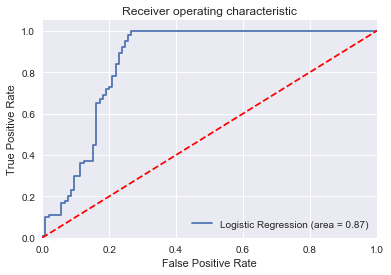

In [124]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()